In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = '/Users/arshad/Downloads/data.csv'

In [3]:
data = pd.read_csv(file_path)

In [4]:
data['house_age'] = 2024 - data['yr_built'] 

In [5]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
            'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'house_age']

In [6]:
X = data[features]

In [7]:
y = data['price']

In [8]:
X = X[(np.abs((X - X.mean()) / X.std()) < 3).all(axis=1)]

In [9]:
y = y.loc[X.index]

In [10]:
scaler = StandardScaler()

In [11]:
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
linear_model = LinearRegression()

In [14]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [15]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [16]:
X_train_poly = poly.fit_transform(X_train)

In [17]:
X_test_poly = poly.transform(X_test)

In [18]:
ridge_model = Ridge(alpha=1.0)

In [19]:
lasso_model = Lasso(alpha=0.1)

In [20]:
ridge_model.fit(X_train_poly, y_train)

Ridge()

In [21]:
lasso_model.fit(X_train_poly, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.666e+14, tolerance: 1.102e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [22]:
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test_poly)
y_pred_lasso = lasso_model.predict(X_test_poly)

In [23]:
linear_mse = mean_squared_error(y_test, y_pred_linear)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

In [24]:
linear_r2 = r2_score(y_test, y_pred_linear)
ridge_r2 = r2_score(y_test, y_pred_ridge)
lasso_r2 = r2_score(y_test, y_pred_lasso)

In [25]:
print(f"Linear Regression MSE: {linear_mse}, R-squared: {linear_r2}")
print(f"Ridge Regression MSE: {ridge_mse}, R-squared: {ridge_r2}")
print(f"Lasso Regression MSE: {lasso_mse}, R-squared: {lasso_r2}")

Linear Regression MSE: 40631569065.23792, R-squared: 0.4189628956927679
Ridge Regression MSE: 39453445036.250206, R-squared: 0.43581023361414406
Lasso Regression MSE: 39487185093.72388, R-squared: 0.43532774608671954


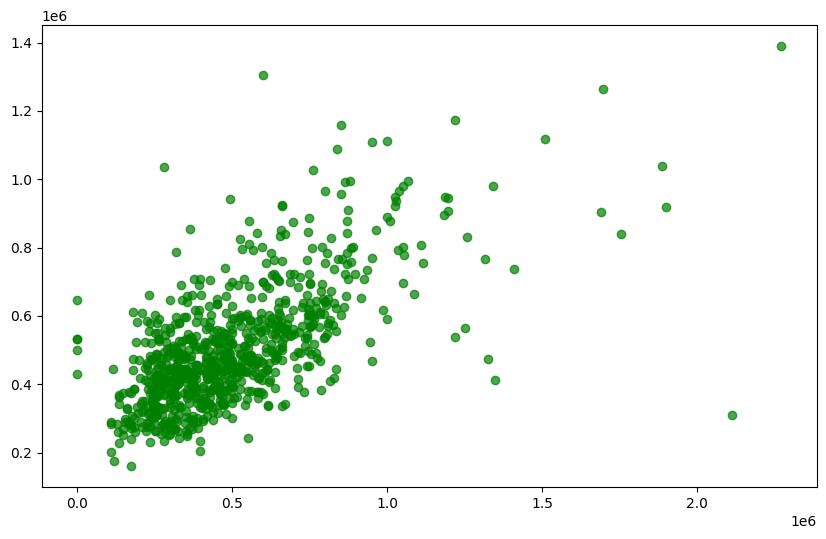

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.7, color='g', label='Ridge Predicted')

Text(0.5, 0, 'Actual Prices')

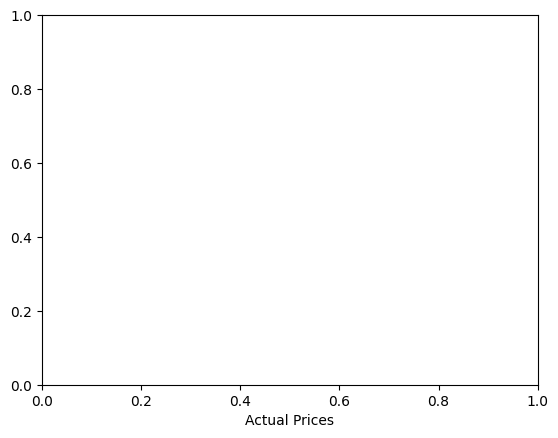

In [31]:
plt.xlabel('Actual Prices')


Text(0, 0.5, 'Predicted Prices')

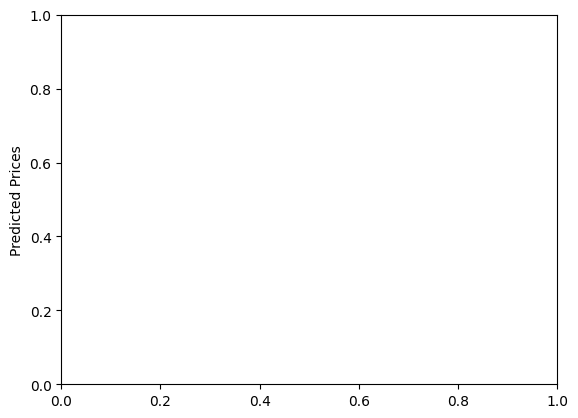

In [32]:
plt.ylabel('Predicted Prices')


Text(0.5, 1.0, 'Actual vs Predicted Prices (Ridge)')

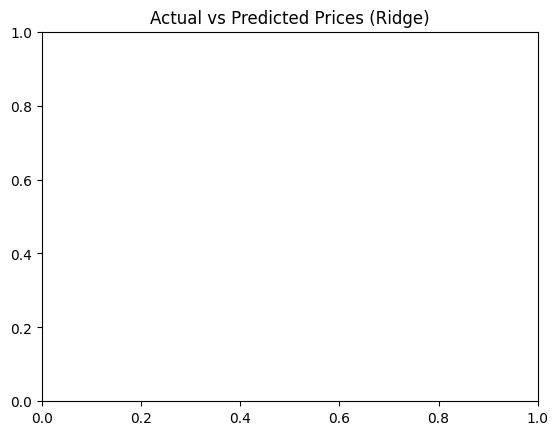

In [33]:
plt.title('Actual vs Predicted Prices (Ridge)')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


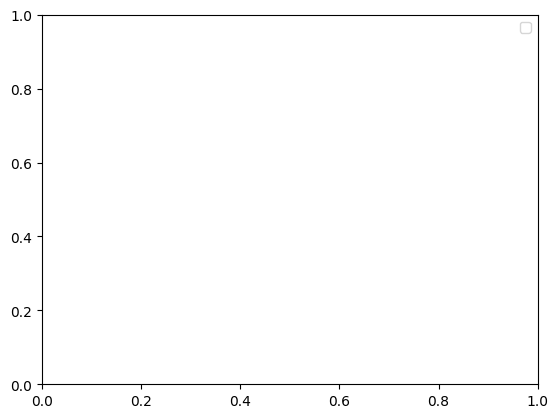

In [36]:
plt.legend()
# plt.show()